# X-Mentor



## Introduction

<br>

Mental health challenges among university students, particularly at Dedan Kimathi University, present a significant concern with potential consequences on academic performance, daily functioning, and overall well-being. Despite the increasing prevalence of mental health issues, there is often a lack of proactive mechanisms for early detection and support within the university community. The existing gap necessitates an innovative solution that aligns with the contemporary communication landscape, particularly on Twitter.
The problem at hand is the absence of a dedicated and accessible platform for identifying and addressing potential mental health concerns expressed by Dedan Kimathi University students on Twitter. The traditional support systems may not be readily accessible, and the stigmatization of mental health discussions further compounds the challenge. Existing approaches fall short of providing a real-time, user-centric solution that comprehensively analyzes user language patterns to flag and respond to potential mental health issues.
The lack of a targeted AI-based intervention contributes to the delayed or inadequate support for students expressing distress on social media. As such, the development of an AI-based Mental Health Detection and Support Bot is imperative to bridge this gap. The outlined objectives aim to provide a user-friendly tool that not only identifies language indicative of mental health concerns but also responds with timely and supportive messages tailored to the unique context of Dedan Kimathi University. Through the proposed research questions, the project seeks to uncover the language patterns relevant to this specific university context, assess the bot's efficacy, and gather user feedback to continually improve and tailor the intervention for optimal impact within the Dedan Kimathi University student community.


## General Objective
Develop a user-friendly AI-based bot for Twitter that analyzes user language to flag potential mental health concerns, provides help, and specifically target Dedan Kimathi University students.


## Specific objectives
1.	Implement a language analysis algorithm to detect key indicators of mental health issues, such as curse words and distress expressions, in Twitter posts from Dedan Kimathi University students.
1.	Integrate the bot with the Twitter API to monitor tweets in real-time, flagging and responding to identified mental health concerns with supportive messages.
1.	Create a user-friendly web interface for the bot, allowing users to easily access and understand flagged tweets and the provided help messages.


### 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


import warnings

### 2. Viewing Data

In [4]:
train = pd.read_csv('/content/train_tweet.csv')
test = pd.read_csv('/content/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


*There are 31962 training tweets and 17197 testing tweets.*

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

*Conclusion: The data is fairly clean and has no missing values*

### Checking out the negative comments from the train set

In [8]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


### Checking out the positive comments from the train set

In [9]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


### Value Counts Visualization

<Axes: >

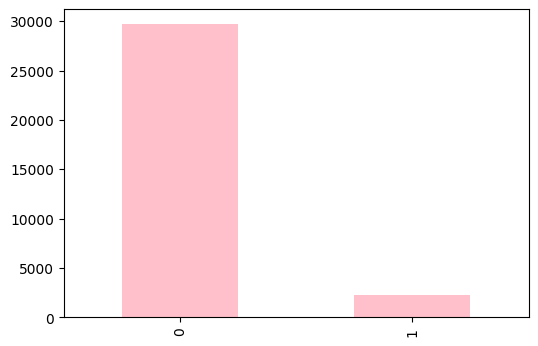

In [10]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

### Checking the distribution of tweets in the data

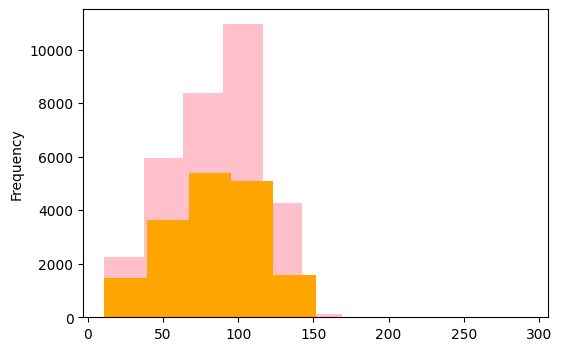

In [11]:
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

#### Exporting `positive_vs_negative_plot.html`



In [12]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=train['label'].value_counts().index, y=train['label'].value_counts().values, marker_color='pink'))

fig.update_layout(title='Positive vs Negative Counts', xaxis_title='Labels', yaxis_title='Counts')


#### Exporting `tweets_distribution.html`



In [13]:
fig = make_subplots(rows=1, cols=1)

length_train = train['tweet'].str.len()
fig.add_trace(go.Histogram(x=length_train, marker_color='pink'), row=1, col=1)

length_test = test['tweet'].str.len()
fig.add_trace(go.Histogram(x=length_test, marker_color='orange'), row=1, col=1)

fig.update_layout(title_text='Distribution of Tweet Lengths',
                  xaxis_title_text='Tweet Length',
                  yaxis_title_text='Frequency')

pio.write_html(fig, file='tweets_distribution.html')

### Adding a column to represent the length of the tweet

In [14]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [15]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

### Variation of tweets' length visualization

<ipython-input-16-250f85d53a70>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



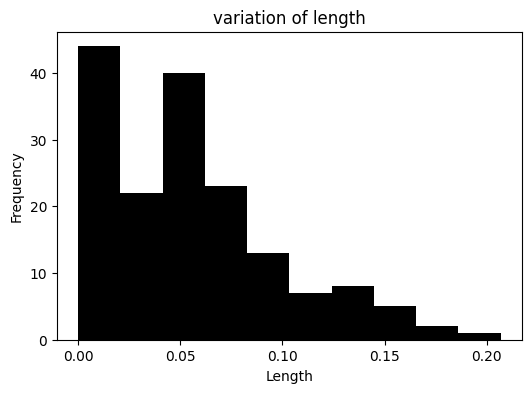

In [16]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

#### Exporting `tweet_length_variation.html`

In [17]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=train['len'], marker_color='black'))

fig.update_layout(title_text='Variation of Length',
                  xaxis_title_text='Length',
                  yaxis_title_text='Mean Label',
                  bargap=0.1)

pio.write_html(fig, file='tweet_length_variation.html')

### Most frequently occuring words visualization

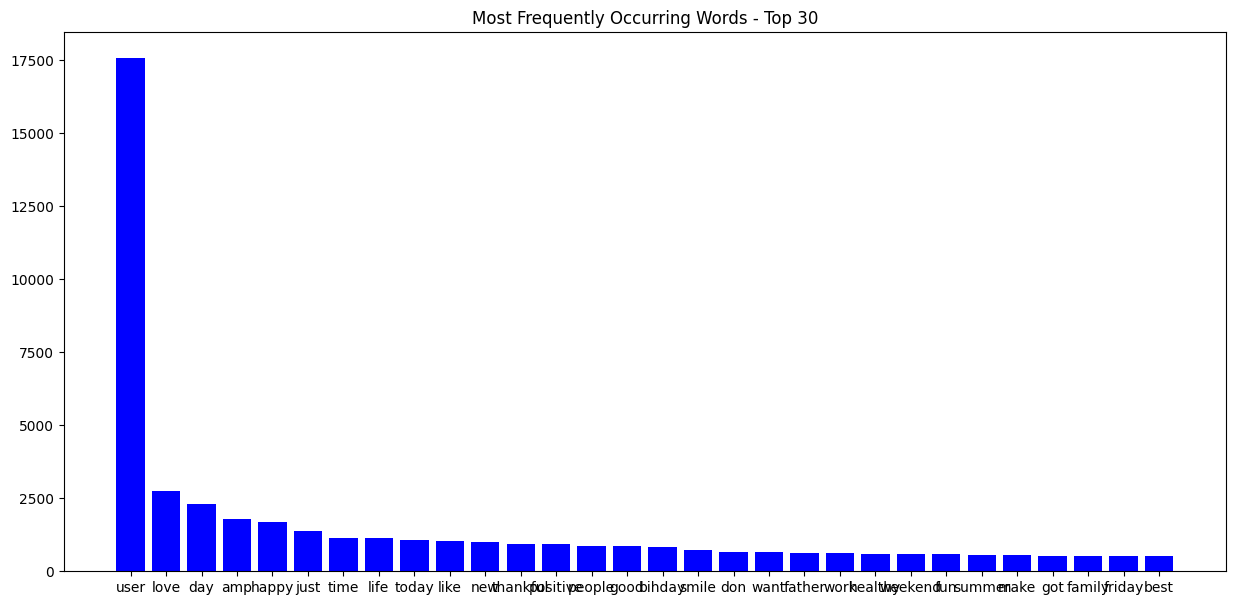

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.figure(figsize=(15, 7))
plt.bar(frequency['word'].head(30), frequency['freq'].head(30), color='blue')
plt.title("Most Frequently Occurring Words - Top 30")

plt.savefig('most_frequently_occurring_words.png')

fig = go.Figure()

fig.update_layout(images=[go.layout.Image(
    source='most_frequently_occurring_words.png',
    x=0,
    y=1,
    xref='paper',
    yref='paper',
    sizex=0.5,
    sizey=0.5,
    opacity=1,
    layer='below'
)])

fig.update_layout(title_text='Most Frequently Occurring Words - Top 30', xaxis_title='Word', yaxis_title='Frequency')

pio.write_html(fig, file='most_frequently_occurring_words.html')


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot with Plotly directly
fig = go.Figure()

fig.add_trace(go.Bar(x=frequency['word'].head(30), y=frequency['freq'].head(30), marker_color='blue'))

fig.update_layout(title_text='Most Frequently Occurring Words - Top 30', xaxis_title='Word', yaxis_title='Frequency')

pio.write_html(fig, file='most_frequently_occurring_words.html')


#### Exporting `most_frequently_occurring_words.html`



Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

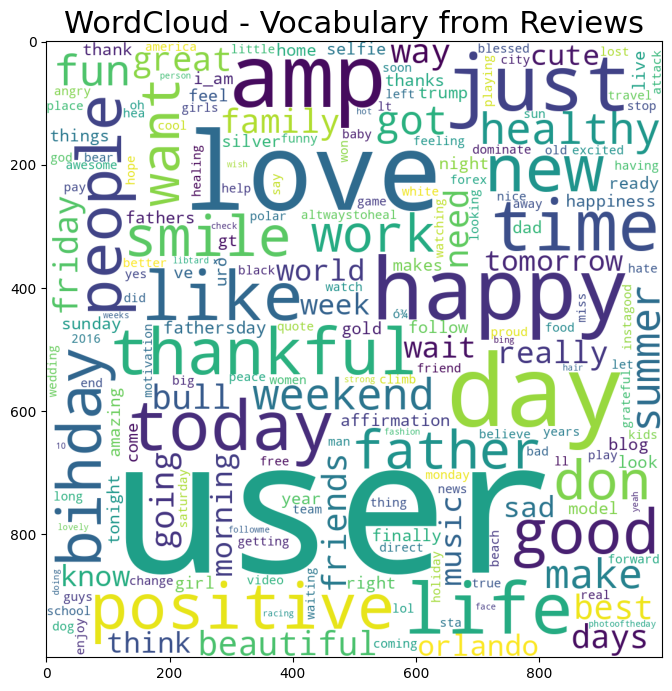

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)


### WordCloud - Vocabulary from Reviews Visualization

In [21]:
from wordcloud import WordCloud
import plotly.graph_objects as go
import matplotlib.pyplot as plt

fig = go.Figure()

wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(words_freq))

fig.add_trace(go.Image(z=wordcloud.to_array()))

fig.update_layout(title_text="WordCloud - Vocabulary from Reviews", title_font_size=22)

fig.write_html('wordCloud_vocabulary_from_reviews.html')


##### Exporting `neutral_words.html`


In [22]:
from wordcloud import WordCloud
import plotly.graph_objects as go
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

fig = go.Figure()

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)

fig.add_trace(go.Image(z=wordcloud.to_array()))

fig.update_layout(title_text="The Neutral Words", title_font_size=22)

fig.write_html('neutral_words.html')

### The Neutral Words Visualization

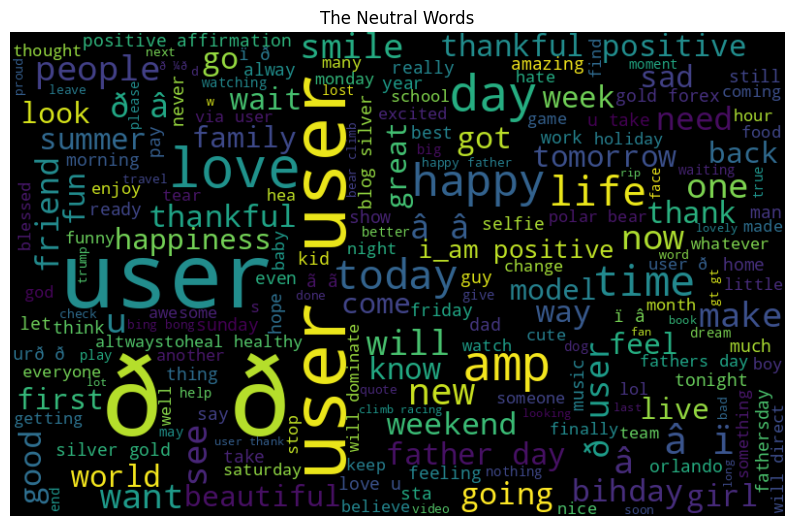

In [23]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


### The Negative Words

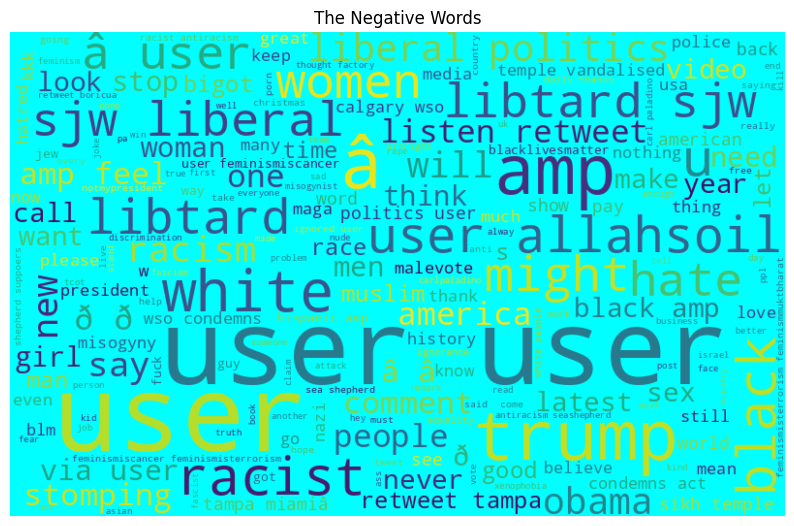

In [24]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()
fig.write_html('negative_words.html')

#### Exxporting `negative_words.html`



In [25]:
from wordcloud import WordCloud
import plotly.graph_objects as go
import matplotlib.pyplot as plt

negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

fig = go.Figure()

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)

fig.add_trace(go.Image(z=wordcloud.to_array()))

fig.update_layout(title_text="The Negative Words", title_font_size=22)

fig.write_html('negative_words.html')

### Collecting the hashtags

In [26]:
import re

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

#### Extracting hashtags from non racist/sexist tweets

In [27]:
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Selecting top 20 most frequent hashtags

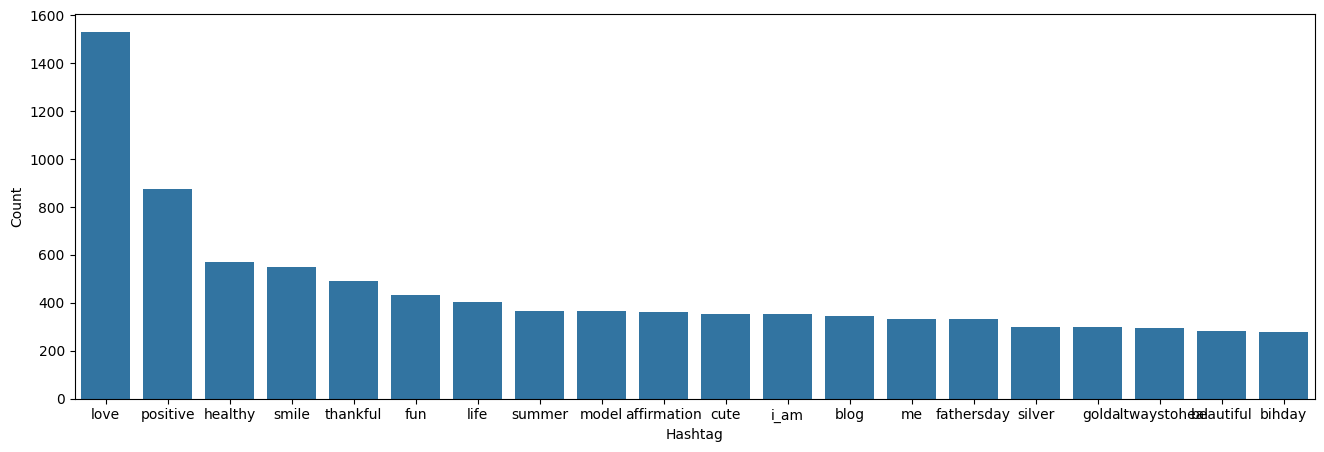

In [28]:
import nltk

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


#### Exporting `20_most_frequent_negative_hashtags.html`

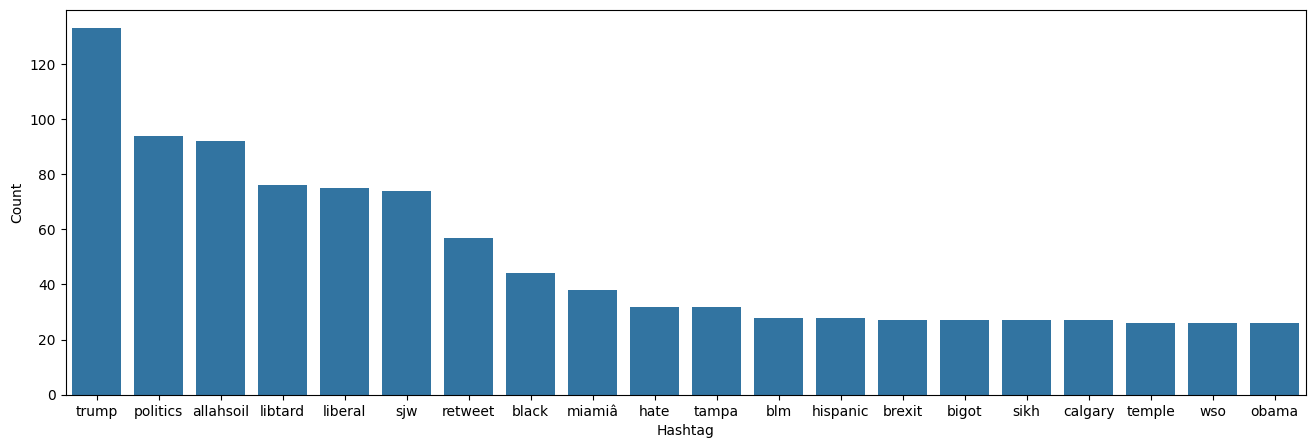

In [29]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
fig.write_html('20_most_frequent_negative_hashtags.html')

### Top 20 Most Frequent Neutral Hashtags

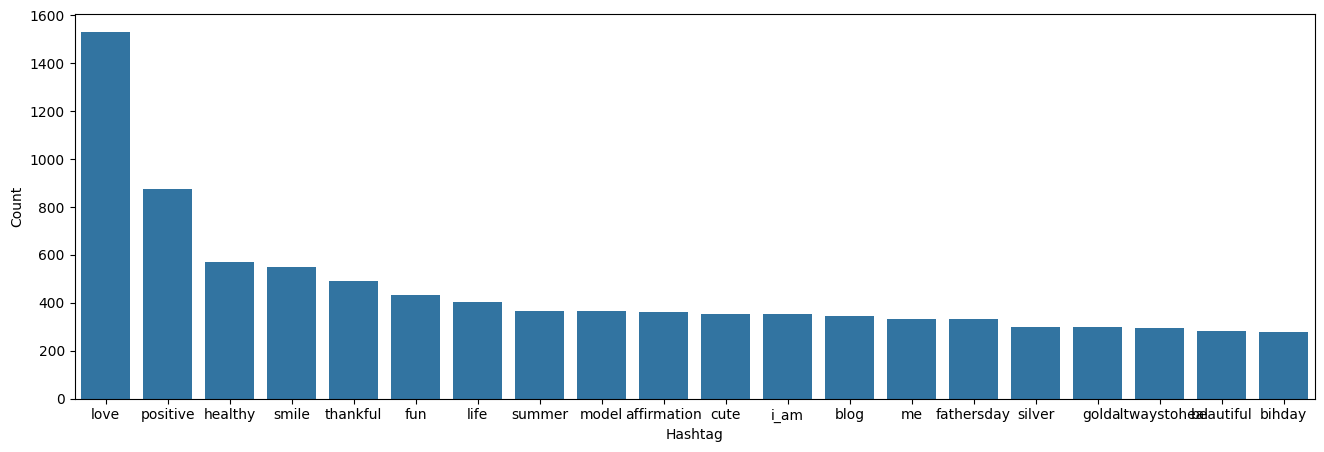

In [30]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns="Count", n=20)

plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

fig = go.Figure()
fig.add_trace(go.Bar(x=d['Hashtag'], y=d['Count']))

fig.update_layout(title_text="Top 20 Most Frequent Neutral Hashtags", title_font_size=18)

fig.write_html('20_most_frequent_neutral_hashtags.html')


#### Exporting `20_most_frequent_negative_hashtags.html`

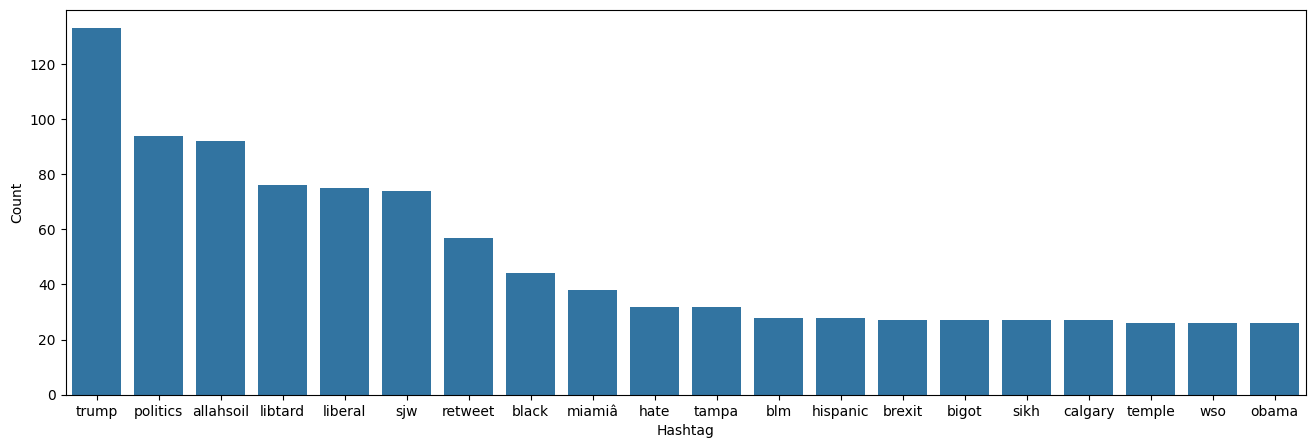

In [31]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns="Count", n=20)

plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

fig = go.Figure()
fig.add_trace(go.Bar(x=d['Hashtag'], y=d['Count']))

fig.update_layout(title_text="Top 20 Most Frequent Negative Hashtags", title_font_size=18)

fig.write_html('20_most_frequent_negative_hashtags.html')


#### Tokenizing the words present in the training set

In [32]:
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

import gensim

model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,
    sg=1,
    hs=0,
    negative=10,
    workers=2,
    seed=34
)

model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)


(6109793, 8411580)

#### Testing

In [33]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6713457703590393),
 ('#prosecco', 0.6262232065200806),
 ('#wanderlust', 0.6013128757476807),
 ('fluffy', 0.5971730947494507),
 ('#deutschland', 0.5880066752433777),
 ('#restaurant', 0.5830743312835693),
 ('7!', 0.5817543268203735),
 ('#boardgames', 0.5783932209014893),
 ('coaching', 0.5779764652252197),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5766583681106567)]

In [34]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7048082947731018),
 ('level.', 0.692138135433197),
 ('ways.', 0.6886024475097656),
 ('#merica', 0.6869560480117798),
 ('ownership', 0.6828452944755554),
 ('intelligent', 0.6823770403862),
 ('aol', 0.6817699670791626),
 ('spots.', 0.681427001953125),
 ('tolerance', 0.6802441477775574),
 ('law.', 0.6794952750205994)]

In [35]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7078200578689575),
 ('"mytraining"', 0.7039957642555237),
 ('training"', 0.6851895451545715),
 ('app,', 0.6437063217163086),
 ('"my', 0.6053446531295776),
 ('app', 0.5964861512184143),
 ('bees', 0.5817535519599915),
 ('heroku', 0.5761133432388306),
 ('ta', 0.5743971467018127),
 ("domino's", 0.5632344484329224)]

In [36]:
model_w2v.wv.most_similar(negative = "hate")

[('#staup', 0.022724879905581474),
 ('â\x9c\x88ï¸\x8f', 0.020933523774147034),
 ('#ireland', 0.003975582774728537),
 ('#css', 0.003937653731554747),
 ('#foodie', 0.0003654570609796792),
 ('street,', -0.0023828463163226843),
 ('#ebay', -0.004691518377512693),
 ('lion', -0.005943953525274992),
 ('#babies', -0.005968964658677578),
 ('#inlove', -0.006628380157053471)]

### Labelling Tweets

In [37]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [38]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

### Removing unwanted patterns from the data

In [39]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Train set

In [40]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

#### Test set

In [41]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

### Creating bag of words

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


### Splitting the training data into train and valid sets

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


### Model selection, training and accuracy

#### RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

print("F1 score :", f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9990822243544283
Validation Accuracy : 0.951820798398198
F1 score : 0.6018614270941054
[[7315  117]
 [ 268  291]]


In [47]:
import pickle

filename = 'x-mentor.pkl'

pickle.dump(model, open(filename, 'wb'))


In [48]:
pickle.load(open(filename, 'rb'))

RandomForestClassifier()

#### LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9331748216743837
f1 score : 0.5451448040885861
[[7137  295]
 [ 239  320]]


#### SVC

In [51]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]


XGBClassifier

In [52]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608693838388053
Validation Accuracy : 0.9550744587661119
f1 score : 0.575147928994083
[[7389   43]
 [ 316  243]]
